# **Exploratory Data Analysis Lab**


## Objectives


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


Import the pandas module.


In [27]:
import pandas as pd

Load the dataset into a dataframe.


In [28]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plotted the distribution curve for the column `ConvertedComp`.


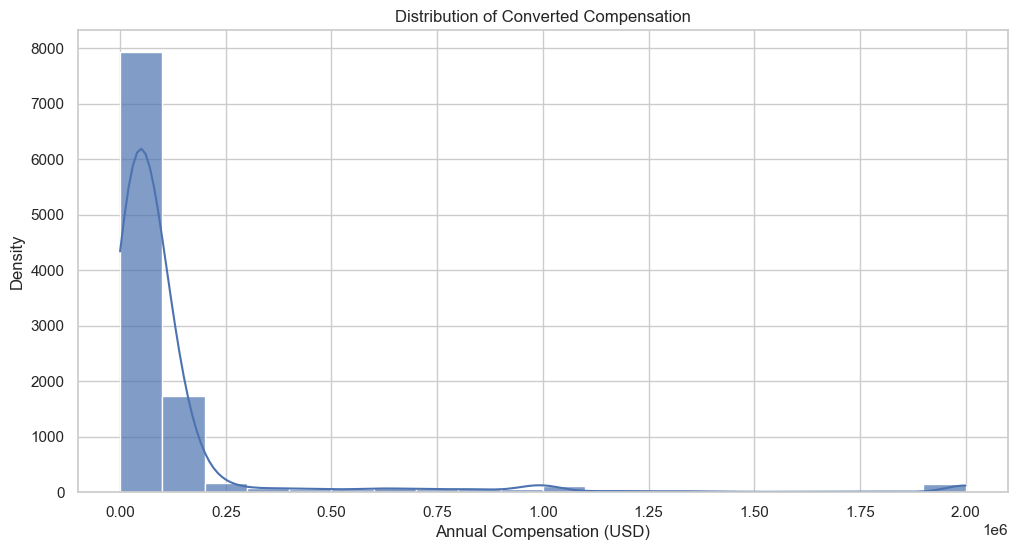

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['ConvertedComp'], kde=True, bins=20, alpha=0.7)

plt.title('Distribution of Converted Compensation')
plt.xlabel('Annual Compensation (USD)')
plt.ylabel('Density')

plt.show()



Plotted the histogram for the column `ConvertedComp`.


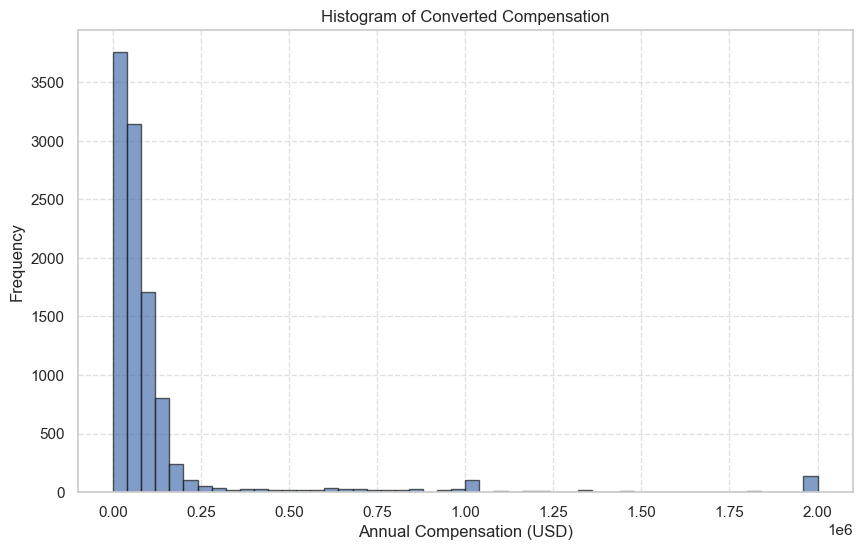

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Converted Compensation')
plt.xlabel('Annual Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


The median of the column `ConvertedComp`



In [31]:
median_converted_comp = df['ConvertedComp'].median()
print("Median of ConvertedComp:", median_converted_comp)


Median of ConvertedComp: 57745.0


Responders identified themselves only as a **Man**?


In [32]:
man_count = df[df['Gender'] == 'Man'].shape[0]
print("Number of responders who identified themselves as Man:", man_count)


Number of responders who identified themselves as Man: 10480


The  median ConvertedComp of responders identified themselves only as a **Woman**


In [34]:
woman_median = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print("Median ConvertedComp for responders identified as Woman:", woman_median)


Median ConvertedComp for responders identified as Woman: 57708.0


In [35]:

summary = df['Age'].describe(percentiles=[.25, .5, .75])
five_number_summary = {
    'min': summary['min'],
    'q1': summary['25%'],
    'median': summary['50%'],
    'q3': summary['75%'],
    'max': summary['max']
}
print(five_number_summary)


{'min': 16.0, 'q1': 25.0, 'median': 29.0, 'q3': 35.0, 'max': 99.0}


Plotted a histogram of the column `Age`.


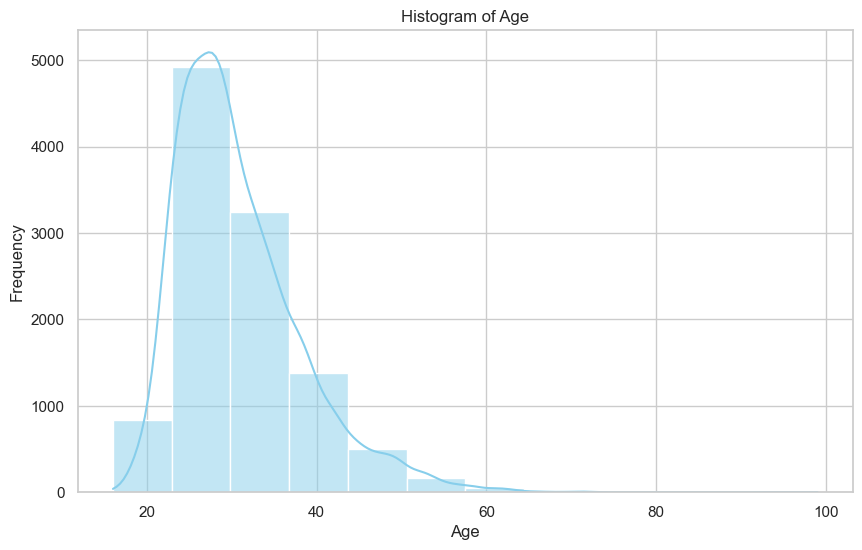

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x="Age", kde=True, bins=12, color="skyblue")

plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()


In [37]:
median_compensation_before_outliers = df['ConvertedComp'].median()
print("Median ConvertedComp before removing outliers:", median_compensation_before_outliers)


Median ConvertedComp before removing outliers: 57745.0


## Outliers


### Finding outliers


Found out if outliers exist in the column `ConvertedComp` using a box plot


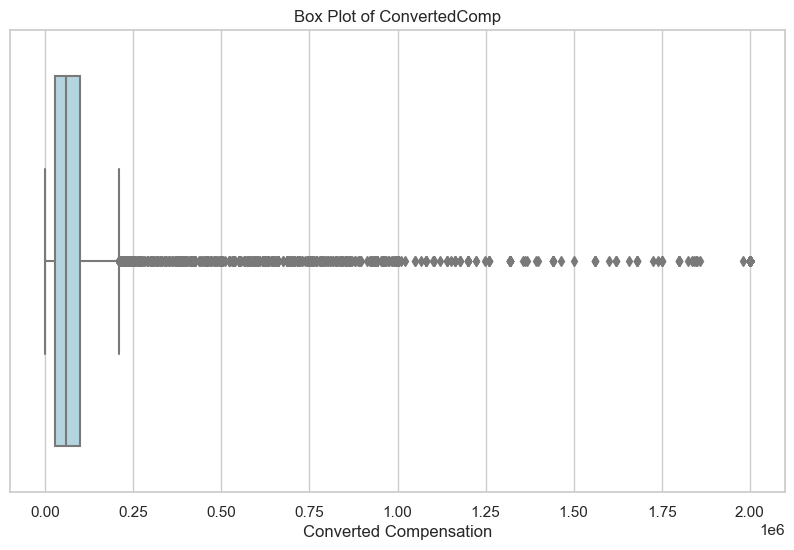

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.boxplot(x="ConvertedComp", data=df, color="lightblue")

plt.title("Box Plot of ConvertedComp")
plt.xlabel("Converted Compensation")
plt.show()


The Inter Quartile Range for the column `ConvertedComp`.


In [39]:
import numpy as np

Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for ConvertedComp:", IQR)


Interquartile Range (IQR) for ConvertedComp: 73132.0


The upper and lower bounds.


In [40]:
# your code goes here
import numpy as np

Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("Upper Bound for ConvertedComp:", upper_bound)
print("Lower Bound for ConvertedComp:", lower_bound)


Upper Bound for ConvertedComp: 209698.0
Lower Bound for ConvertedComp: -82830.0


Identify the number of outliers there are  in the `ConvertedComp` column.


In [41]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = len(outliers)

print("Number of outliers in ConvertedComp:", num_outliers)


Number of outliers in ConvertedComp: 879


In [43]:
# Calculate Q1 and Q3
Q1 = np.percentile(df['Age'], 25)
Q3 = np.percentile(df['Age'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower bound
lower_bound = Q1 - 1.5 * IQR

# Count the number of data points below the lower bound
outliers_below_Q1 = df[df['Age'] < lower_bound]

print("Number of outliers below Q1:", len(outliers_below_Q1))


Number of outliers below Q1: 0


Created  a new dataframe by removing the outliers from the `ConvertedComp` column.


In [47]:
# Remove outliers from the dataframe
df1 = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]


In [46]:
mean_ConvertedComp = df1['ConvertedComp'].mean()
print("Mean ConvertedComp after removing outliers:", mean_ConvertedComp)


Mean ConvertedComp after removing outliers: nan


## Correlation


### Finding correlation


Found the correlation between `Age` and all other numerical columns.


In [51]:
# Check the data types of all columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculate and print the correlation coefficient with "Age" for each numerical column
for col in numerical_columns:
    correlation = df['Age'].corr(df[col])
    print(f"Correlation between Age and {col}: {correlation:.2f}")




Correlation between Age and Respondent: 0.00
Correlation between Age and CompTotal: 0.01
Correlation between Age and ConvertedComp: 0.11
Correlation between Age and WorkWeekHrs: 0.04
Correlation between Age and CodeRevHrs: -0.02
Correlation between Age and Age: 1.00


## Author


Karim Ali
